<a href="https://colab.research.google.com/github/kadobkina/diplom/blob/master/%D0%B4%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC_%D0%B8%D1%82%D0%BE%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kadobkina","key":"dd8f943bddbccadf6be2b84dcb212ed7"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d robinreni/signature-verification-dataset

 99% 597M/601M [00:05<00:00, 105MB/s]
100% 601M/601M [00:05<00:00, 121MB/s]


In [6]:
!unzip signature-verification-dataset.zip

Archive:  signature-verification-dataset.zip
  inflating: sign_data/sign_data/test/049/01_049.png  
  inflating: sign_data/sign_data/test/049/02_049.png  
  inflating: sign_data/sign_data/test/049/03_049.png  
  inflating: sign_data/sign_data/test/049/04_049.png  
  inflating: sign_data/sign_data/test/049/05_049.png  
  inflating: sign_data/sign_data/test/049/06_049.png  
  inflating: sign_data/sign_data/test/049/07_049.png  
  inflating: sign_data/sign_data/test/049/08_049.png  
  inflating: sign_data/sign_data/test/049/09_049.png  
  inflating: sign_data/sign_data/test/049/10_049.png  
  inflating: sign_data/sign_data/test/049/11_049.png  
  inflating: sign_data/sign_data/test/049/12_049.png  
  inflating: sign_data/sign_data/test/049_forg/01_0114049.PNG  
  inflating: sign_data/sign_data/test/049_forg/01_0206049.PNG  
  inflating: sign_data/sign_data/test/049_forg/01_0210049.PNG  
  inflating: sign_data/sign_data/test/049_forg/02_0114049.PNG  
  inflating: sign_data/sign_data/test/0

In [7]:
my_data_dir = '/content/sign_data'

In [8]:
os.listdir(my_data_dir) 

['test', 'test_data.csv', 'train', 'train_data.csv', 'sign_data']

In [9]:
!rm -rf '/content/sign_data/sign_data'

In [10]:
#!rm -rf '/content/sign_data'

In [11]:
os.listdir(my_data_dir) 

['test', 'test_data.csv', 'train', 'train_data.csv']

In [12]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

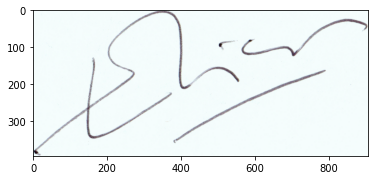

In [13]:
ex_sign = train_path+'/001/'+os.listdir(train_path+'//001')[1]
sign_img= imread(ex_sign)
plt.imshow(sign_img)

In [14]:
sign_img.shape

(394, 906, 3)

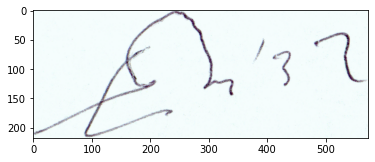

In [15]:
ex_sign_forg = train_path+'/001_forg/'+os.listdir(train_path+'//001_forg')[1]
sign_forg_img = imread(ex_sign_forg)
plt.imshow(sign_forg_img)

In [16]:
sign_forg_img.shape

(218, 573, 3)

In [17]:
new_folder = os.path.join(train_path, 'real')
os.makedirs(new_folder)

In [18]:
new_folder = os.path.join(train_path, 'forged')
os.makedirs(new_folder)

In [19]:
new_folder = os.path.join(test_path, 'real')
os.makedirs(new_folder)

In [20]:
new_folder = os.path.join(test_path, 'forged')
os.makedirs(new_folder)

In [21]:
#шум соли и перца
import os
import cv2
def salt_pepper_noisy(image):
    s_vs_p = 0.5
    amount = 0.04
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[coords] = 1

     # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords] = 0
    return out

In [22]:
list_of_strings = ['049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069']

In [23]:
ok = True

In [24]:
from PIL import Image
from tensorflow.keras.preprocessing import image
for folder_name in os.listdir(train_path):  
    for num in list_of_strings:
        if num in folder_name:
             ok = False
    if ok:
        if folder_name != 'real' and folder_name != 'forged':
             if 'forg' in folder_name:           
                 os.system("cp -r {} /content/sign_data/train/forged".format(train_path+folder_name))     
                 for i in range(1,6):
                    imgn = salt_pepper_noisy(imread(train_path+folder_name+'/'+os.listdir(train_path+folder_name)[i]))
                    Image.fromarray((imgn * 255).astype('uint8'), 'RGB').save('/content/sign_data/train/forged/'+folder_name+'/'+os.listdir(train_path+folder_name)[i]+'_noise.png')   
             else:    
                 os.system("cp -r {} /content/sign_data/train/real".format(train_path+folder_name))
                 for i in range(1,6):
                    imgn = salt_pepper_noisy(imread(train_path+folder_name+'/'+os.listdir(train_path+folder_name)[i]))
                    Image.fromarray((imgn * 255).astype('uint8'), 'RGB').save('/content/sign_data/train/real/'+folder_name+'/'+os.listdir(train_path+folder_name)[i]+'_noise.png')   

    ok = True
    if '0' in folder_name:   
        del_path = '/content/sign_data/train/' + folder_name
        os.system("rm -r {}".format(del_path))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


In [25]:
for folder_name in os.listdir(test_path):
    if folder_name != 'real' and folder_name != 'forged':
        if 'forg' in folder_name:           
            os.system("cp -r {} /content/sign_data/test/forged".format(test_path+folder_name))  
            for i in range(1,6):
                imgn = salt_pepper_noisy(imread(test_path+folder_name+'/'+os.listdir(test_path+folder_name)[i]))
                Image.fromarray((imgn * 255).astype('uint8'), 'RGB').save('/content/sign_data/test/forged/'+folder_name+'/'+os.listdir(test_path+folder_name)[i]+'_noise.png')        
        else:    
            os.system("cp -r {} /content/sign_data/test/real".format(test_path+folder_name))
            for i in range(1,6):
                imgn = salt_pepper_noisy(imread(test_path+folder_name+'/'+os.listdir(test_path+folder_name)[i]))
                Image.fromarray((imgn * 255).astype('uint8'), 'RGB').save('/content/sign_data/test/real/'+folder_name+'/'+os.listdir(test_path+folder_name)[i]+'_noise.png')   

    if '0' in folder_name:   
       del_path = '/content/sign_data/test/' + folder_name
       os.system("rm -r {}".format(del_path))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


In [26]:
from pathlib import Path
real_count_train = 0
for folder_name in os.listdir('/content/sign_data/train/real'):
    real_count_train = real_count_train + len(list(Path('/content/sign_data/train/real/'+folder_name).iterdir()))

In [27]:
real_count_train

850

In [28]:
forg_count_train = 0
for folder_name in os.listdir('/content/sign_data/train/forged'):
    forg_count_train = forg_count_train + len(list(Path('/content/sign_data/train/forged/'+folder_name).iterdir()))

In [29]:
forg_count_train

729

In [30]:
from pathlib import Path
real_count_test = 0
for folder_name in os.listdir('/content/sign_data/test/real'):
    real_count_test = real_count_test + len(list(Path('/content/sign_data/test/real/'+folder_name).iterdir()))

In [31]:
real_count_test

357

In [32]:
from pathlib import Path
forg_count_test = 0
for folder_name in os.listdir('/content/sign_data/test/forged'):
    forg_count_test = forg_count_test + len(list(Path('/content/sign_data/test/forged/'+folder_name).iterdir()))

In [33]:
forg_count_test

353

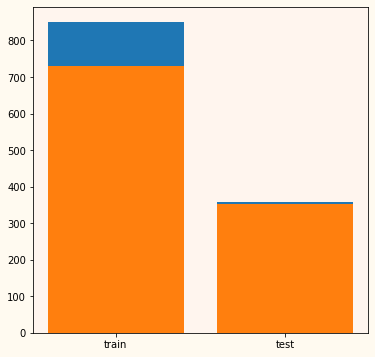

In [34]:
import matplotlib.pylab as plt

fig, ax = plt.subplots()

ax.bar(['train','test'], [850, 357])
ax.bar(['train','test'], [729, 353])

ax.set_facecolor('seashell')
fig.set_figwidth(6)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.show()

In [35]:
dim11 = []
dim22 = []
for i in range(1, 9):
  try:
      for image_filename in os.listdir(train_path+'real/00'+str(i)):
          img = imread(train_path+'real/00'+str(i)+'/'+image_filename)
          d1,d2,colors = img.shape
          dim11.append(d1)
          dim22.append(d2)
  except:
      print('a')
for i in range(10, 48):
    try:
       for image_filename in os.listdir(train_path+'real/0'+str(i)):
          img = imread(train_path+'real/0'+str(i)+'/'+image_filename)
          d1,d2,colors = img.shape
          dim11.append(d1)
          dim22.append(d2)
    except:
      print('a')

a
a
a
a
a


In [36]:
for i in range(49, 69):
   for image_filename in os.listdir(test_path+'real/0'+str(i)):
      img = imread(test_path+'real/0'+str(i)+'/'+image_filename)
      d1,d2,colors = img.shape
      dim11.append(d1)
      dim22.append(d2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


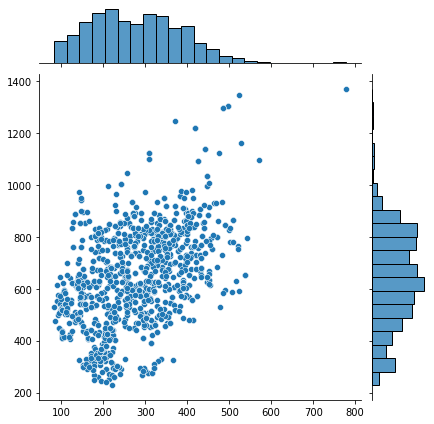

In [37]:
sns.jointplot(dim11,dim22)

In [38]:
np.mean(dim11)

275.68793706293707

In [39]:
np.mean(dim22)

642.895979020979

In [40]:
image_shape = (100,200,3)

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
image_gen = ImageDataGenerator(rotation_range=15, # поворачивает изображение на 30 градусов
                               width_shift_range=0.2, # изменяет ширину изображения максимум на 10%
                               height_shift_range=0.2, # изменяет высоту изображения максимум на 10%
                               rescale=1/255, # нормализация изображения: пиксели в диапазоне от 0 до 1
                               shear_range=0.1, # отрезание части изображения максимум на 5%
                               zoom_range=0.1, # увеличение изображения максимум на 5%
                               horizontal_flip=True, # разрешение на горизонтальное переворачивание
                              )

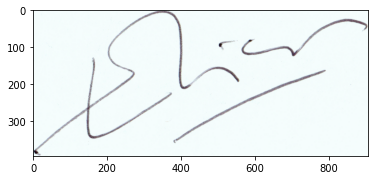

In [43]:
plt.imshow(sign_img)

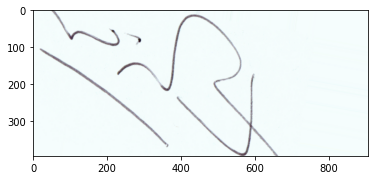

In [44]:
plt.imshow(image_gen.random_transform(sign_img))

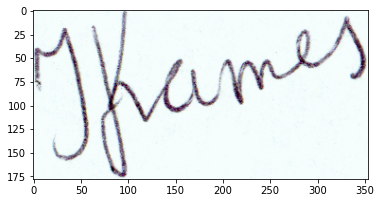

In [45]:
ex_sign_forg = train_path+'/forged/004_forg/'+os.listdir(train_path+'/forged/004_forg')[0]
sign_forg_img = imread(ex_sign_forg)
plt.imshow(sign_forg_img)

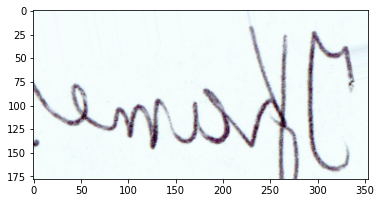

In [46]:
plt.imshow(image_gen.random_transform(sign_forg_img))

In [47]:
image_gen.flow_from_directory(train_path)

Found 1579 images belonging to 2 classes.


In [48]:
image_gen.flow_from_directory(test_path)

Found 710 images belonging to 2 classes.


In [49]:
image_shape[:2]

(100, 200)

In [168]:
import keras
def weighted_bincrossentropy(true, pred, weight_zero = 1.0, weight_one = 0.85):
    # calculate the binary cross entropy
    bin_crossentropy = keras.backend.binary_crossentropy(true, pred)
    
    # apply the weights
    weights = true * weight_one + (0.9 - true) * weight_zero
    weighted_bin_crossentropy = weights * bin_crossentropy 

    return keras.backend.mean(weighted_bin_crossentropy)

In [169]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss=weighted_bincrossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [170]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 98, 198, 16)       448       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 49, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 47, 97, 32)        4640      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 23, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 21, 46, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 10, 23, 64)      

In [171]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=64,
                                               class_mode='binary')

Found 1579 images belonging to 2 classes.


In [172]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=64,
                                               class_mode='binary',
                                               shuffle=False)

Found 710 images belonging to 2 classes.


In [173]:
train_image_gen.class_indices

{'forged': 0, 'real': 1}

In [174]:
results = model.fit(train_image_gen,
                              epochs=40,
                              steps_per_epoch=train_image_gen.samples//train_image_gen.batch_size,
                              verbose=1)

Epoch 1/40
24/24 [==============================] - 12s 460ms/step - loss: 0.5727 - accuracy: 0.5043
Epoch 2/40
24/24 [==============================] - 11s 459ms/step - loss: 0.5282 - accuracy: 0.6059
Epoch 3/40
24/24 [==============================] - 11s 461ms/step - loss: 0.3641 - accuracy: 0.8106
Epoch 4/40
24/24 [==============================] - 12s 493ms/step - loss: 0.2954 - accuracy: 0.8548
Epoch 5/40
24/24 [==============================] - 11s 457ms/step - loss: 0.2746 - accuracy: 0.8647
Epoch 6/40
24/24 [==============================] - 11s 465ms/step - loss: 0.2167 - accuracy: 0.8845
Epoch 7/40
24/24 [==============================] - 11s 456ms/step - loss: 0.1966 - accuracy: 0.8997
Epoch 8/40
24/24 [==============================] - 11s 453ms/step - loss: 0.1839 - accuracy: 0.9102
Epoch 9/40
24/24 [==============================] - 11s 452ms/step - loss: 0.1675 - accuracy: 0.9162
Epoch 10/40
24/24 [==============================] - 11s 451ms/step - loss: 0.1505 - accura

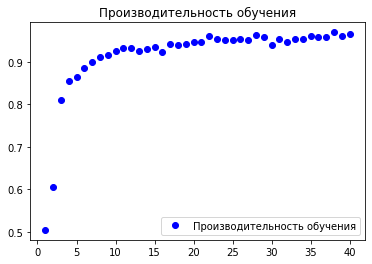

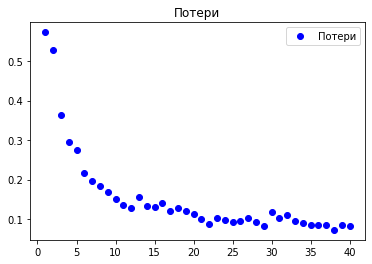

In [175]:
acc = results.history["accuracy"]

loss = results.history["loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Производительность обучения")

plt.title("Производительность обучения")

plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Потери")

plt.title("Потери")

plt.legend()

plt.show()

In [176]:
from tensorflow.keras.models import load_model
model.save('signature.h5')

In [143]:
#files.download("signature.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [177]:
scores = model.evaluate(test_image_gen)

12/12 [==============================] - 6s 524ms/step - loss: 0.0343 - accuracy: 0.9915


In [178]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 99.1549


In [179]:
check_forg = test_path+'forged/049_forg/'+os.listdir(test_path+'forged/049_forg')[0]
check_forg_img = imread(check_forg)
check_forg_img = image.img_to_array(check_forg_img)
type(check_forg_img)

numpy.ndarray

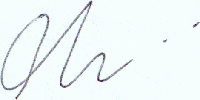

In [180]:
imgg = image.load_img(check_forg,target_size=image_shape)
imgg

In [181]:
x1 = image.img_to_array(imgg)
x1 /= 255
x1 = np.expand_dims(x1, axis=0)
if model.predict(x1)>=0.5:
  print('real')
else:
  print('forged')

forged


In [182]:
check_real = test_path+'/real/049/'+os.listdir(test_path+'/real/049')[0]
check_real_img = imread(check_real)
check_real_img = image.img_to_array(check_real_img)
type(check_real_img)

numpy.ndarray

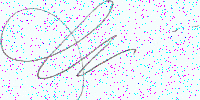

In [183]:
imgg2 = image.load_img(check_real,target_size=image_shape)
imgg2

In [184]:
x2 = image.img_to_array(imgg2)
x2 /= 255
x2 = np.expand_dims(x2, axis=0)
if model.predict(x2)>=0.5:
  print('real')
else:
  print('forged')

forged


In [185]:
check_forg = test_path+'forged/060_forg/'+os.listdir(test_path+'forged/060_forg')[0]
check_forg_img = imread(check_forg)
check_forg_img = image.img_to_array(check_forg_img)
type(check_forg_img)

numpy.ndarray

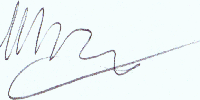

In [186]:
imgg = image.load_img(check_forg,target_size=image_shape)
imgg

In [187]:
x1 = image.img_to_array(imgg)
x1 /= 255
x1 = np.expand_dims(x1, axis=0)
if model.predict(x1)>=0.5:
  print('real')
else:
  print('forged')

forged


In [188]:
check_real = test_path+'/real/060/'+os.listdir(test_path+'/real/060')[0]
check_real_img = imread(check_real)
check_real_img = image.img_to_array(check_real_img)
type(check_real_img)

numpy.ndarray

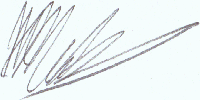

In [189]:
imgg2 = image.load_img(check_real,target_size=image_shape)
imgg2

In [190]:
x2 = image.img_to_array(imgg2)
x2 /= 255
x2 = np.expand_dims(x2, axis=0)
if model.predict(x2)>=0.5:
  print('real')
else:
  print('forged')

real


In [191]:
check_forg = test_path+'forged/069_forg/'+os.listdir(test_path+'forged/069_forg')[3]
check_forg_img = imread(check_forg)
check_forg_img = image.img_to_array(check_forg_img)
type(check_forg_img)

numpy.ndarray

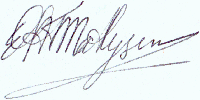

In [192]:
imgg = image.load_img(check_forg,target_size=image_shape)
imgg

In [193]:
x1 = image.img_to_array(imgg)
x1 /= 255
x1 = np.expand_dims(x1, axis=0)
if model.predict(x1)>=0.5:
  print('real')
else:
  print('forged')

forged


In [194]:
check_real = test_path+'/real/069/'+os.listdir(test_path+'/real/069')[3]
check_real_img = imread(check_real)
check_real_img = image.img_to_array(check_real_img)
type(check_real_img)

numpy.ndarray

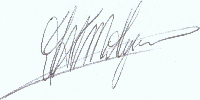

In [195]:
imgg2 = image.load_img(check_real,target_size=image_shape)
imgg2

In [196]:
x2 = image.img_to_array(imgg2)
x2 /= 255
x2 = np.expand_dims(x2, axis=0)
if model.predict(x2)>=0.5:
  print('real')
else:
  print('forged')

real


In [197]:
from tensorflow.keras.preprocessing import image
pred_probabilities = model.predict(test_image_gen)
predictions = pred_probabilities > 0.5

In [198]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       1.00      1.00      1.00       357

    accuracy                           1.00       710
   macro avg       1.00      1.00      1.00       710
weighted avg       1.00      1.00      1.00       710



In [199]:
confusion_matrix(test_image_gen.classes,predictions)

array([[352,   1],
       [  0, 357]])